In [1]:
# Compute JDPF of the product
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd 
import sys 
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_uv_map,plot_map_zoom,plot_map_multizoom
from R_tools_theo import * 

In [2]:
import matplotlib.colors as colors
# 2d hist 
import scipy.stats as st

def plot_jpdf(vrt,strain,title=None):

    binx = np.arange(-1,1.025,0.025)
    biny = np.arange(0,1.0125,0.0125)

    H_sum, xedges, yedges, _ = st.binned_statistic_2d(vrt.ravel(),strain.ravel(),vrt.ravel(),\
                    'count', bins=[binx, biny])

    fig = plt.figure(figsize=(10,5))

    list_proba = [99.9,99,90]

    H_norm = H_sum/np.sum(H_sum)
    ax = fig.add_subplot(1,1,1)
    #plt.title(gap_list[i],size=20)

    plt.pcolormesh(xedges[:],yedges[:],H_norm.T,norm=colors.LogNorm(vmin=1e-6, vmax=1e-1),cmap=plt.cm.Reds)
    cbar = plt.colorbar()
    cbar.set_label('Density', fontsize=16)
    cbar.ax.tick_params(labelsize=16)

    xedges=(xedges[1:]+xedges[:-1])/2
    yedges=(yedges[1:]+yedges[:-1])/2

    plt.xlabel(r'$\zeta/f$',fontsize=16); plt.ylabel(r'$\sigma/f$',fontsize=16)

    if title:
        plt.title(title,fontsize=16)

    #CS = plt.contour(xedges[1:],yedges[1:],H_sum.T,linewidths=2,alpha=1,colors='k',linestyles='-')

    level,fmt = add_contour_per(H_sum.T,list_proba,xedges,yedges,c='k')
    CS = plt.contour(xedges,yedges,H_sum.T,level,linewidths=2,alpha=1,colors='k',linestyles='-')
    plt.clabel(CS,level, inline=1, fontsize=18,fmt = fmt)

    ### LES AJOUTS ####
    x = np.linspace(0, 1, 100)
    x1 = np.linspace(0, 1, 100)
    plt.plot(x1,x1,linestyle='-.',color='grey')
    plt.plot(-x,x,linestyle='-.',color='grey') 

def plot_jpdf_list_daily(vrt_list,strain_list,color_list,style_list,label_list,title=None,legend=False):

    binx = np.arange(-1,1.025,0.025)
    biny = np.arange(0,1.0125,0.0125)
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,1,1)

    i=1

    for vrt,strain,color,style,label in zip(vrt_list,strain_list,color_list,style_list,label_list):
        H_sum, xedges, yedges, _ = st.binned_statistic_2d(vrt.ravel(),strain.ravel(),vrt.ravel(),\
                        'count', bins=[binx, biny])

        
        list_proba = [99.9,90]

        H_norm = H_sum/np.sum(H_sum)

        #plt.title(gap_list[i],size=20)
        if i==len(vrt_list):
            plt.pcolormesh(xedges[:],yedges[:],H_norm.T,norm=colors.LogNorm(vmin=1e-6, vmax=1e-1),cmap=plt.cm.Reds)
            cbar = plt.colorbar()
            cbar.set_label('Density', fontsize=16)
            cbar.ax.tick_params(labelsize=16)
        else:
            i=i+1
        xedges=(xedges[1:]+xedges[:-1])/2
        yedges=(yedges[1:]+yedges[:-1])/2

        plt.xlabel(r'$\zeta/f$',fontsize=16); plt.ylabel(r'$\sigma/f$',fontsize=16)

        if title:
            plt.title(title,fontsize=16)

        #CS = plt.contour(xedges[1:],yedges[1:],H_sum.T,linewidths=2,alpha=1,colors='k',linestyles='-')

        level,fmt = add_contour_per(H_sum.T,list_proba,xedges,yedges,c='k')
        CS = plt.contour(xedges,yedges,H_sum.T,level,linewidths=2,alpha=1,colors=color,linestyles=style)
        plt.plot(0,0,linewidth=2,alpha=1,color=color,linestyle=style,label=label)
        #plt.clabel(CS,label, inline=1, fontsize=18,fmt = fmt)

    ### LES AJOUTS ####
    x = np.linspace(0, 1, 100)
    x1 = np.linspace(0, 1, 100)
    plt.plot(x1,x1,linestyle='-.',color='grey')
    plt.plot(-x,x,linestyle='-.',color='grey') 

    if legend==True:
        plt.legend()

from datetime import datetime, timedelta

def plot_jpdf_list(xp_name_list,domain,start_date,end_date,color_list,style_list,label_list,title=None,legend=False, list_proba = [99.9,90]):

    binx = np.arange(-1,1.025,0.025)
    biny = np.arange(0,1.0125,0.0125)
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,1,1)

    i=1
    
    vrt_list = []
    strain_list = []

    for xp_name,color,style,label in zip(xp_name_list,color_list,style_list,label_list):
        current_date = start_date 
        vrt=[]
        strain=[]
        while current_date <= end_date:
            time_target = current_date.strftime("%Y-%m-%d")
            #print(time_target)
            strain_i, vrt_i, lon, lat = compute_strain_vrt(xp_name,domain=domain,time_target=time_target,interp=True)
            vrt.append(vrt_i)
            strain.append(strain_i)
            current_date += timedelta(days=1)

        vrt=np.array(vrt)
        strain=np.array(strain)    

        #print("compute bin")
        H_sum, xedges, yedges, _ = st.binned_statistic_2d(vrt.ravel(),strain.ravel(),vrt.ravel(),\
                        'count', bins=[binx, biny])

        H_norm = H_sum/np.sum(H_sum)

        #plt.title(gap_list[i],size=20)
        if i==len(xp_name_list):
            plt.pcolormesh(xedges[:],yedges[:],H_norm.T,norm=colors.LogNorm(vmin=1e-6, vmax=1e-1),cmap=plt.cm.Reds)
            cbar = plt.colorbar()
            cbar.set_label('Density', fontsize=16)
            cbar.ax.tick_params(labelsize=16)
        else:
            i=i+1
        xedges=(xedges[1:]+xedges[:-1])/2
        yedges=(yedges[1:]+yedges[:-1])/2

        plt.xlabel(r'$\zeta/f$',fontsize=16); plt.ylabel(r'$\sigma/f$',fontsize=16)

        if title:
            plt.title(title,fontsize=16)

        #CS = plt.contour(xedges[1:],yedges[1:],H_sum.T,linewidths=2,alpha=1,colors='k',linestyles='-')

        level,fmt = add_contour_per(H_sum.T,list_proba,xedges,yedges,c='k')
        CS = plt.contour(xedges,yedges,H_sum.T,level,linewidths=2,alpha=1,colors=color,linestyles=style)
        plt.plot(0,0,linewidth=2,alpha=1,color=color,linestyle=style,label=label)
        #plt.clabel(CS,label, inline=1, fontsize=18,fmt = fmt)

    ### LES AJOUTS ####
    x = np.linspace(0, 1, 100)
    x1 = np.linspace(0, 1, 100)
    plt.plot(x1,x1,linestyle='-.',color='grey')
    plt.plot(-x,x,linestyle='-.',color='grey') 

    lim=0.7
    plt.xlim(-lim,lim)
    plt.ylim(0,lim)
    
    if legend==True:
        plt.legend()


In [3]:
def compute_strain_vrt(xp_name,domain=False,interp=False,time_target=None):

    if time_target is None:
        time_target='2019-01-01'

    if xp_name=="duacs_15m_8th":
        result_filepath =  f"/Odyssey/private/t22picar/multivar_drifter/rec/{xp_name}/daily/duacs_15m_8th_{time_target}.nc"
    elif xp_name=="duacs_cyclo_8th":
        result_filepath =  f"/Odyssey/private/t22picar/process_data/cyclogeo/rec/duacs_cyclo_8th_{time_target}.nc"
    elif xp_name=="GC_houly":
        result_filepath =  f"/Odyssey/private/t22picar/data/uv/GC_hourly/hourly_15m/unet_rec_{time_target}.nc"
    elif xp_name=="globcurrent_raw":
        result_filepath =  "/Odyssey/private/t22picar/data/uv/GC_daily/daily/GC_daily_15.00m_15.00m_2019-02-01-2019-02-20.nc"
    elif xp_name=="globcurrent_raw_h":
        result_filepath =  "/Odyssey/private/t22picar/data/uv/GC_hourly/GC_hourly_15.00m_2019-01-01-2019-12-31.nc"
    else:
        result_filepath =  f"/Odyssey/private/t22picar/multivar_drifter/rec/{xp_name}/daily/unet_rec_{time_target}.nc"

    if xp_name=="globcurrent_raw":
        duacs = xr.open_dataset(result_filepath).sel(time=time_target).isel(depth=0)
        duacs = duacs.rename({"uo": "ugos"})
        duacs = duacs.rename({"vo": "vgos"})

    elif xp_name=="globcurrent_raw_h":
        duacs = xr.open_dataset(result_filepath).sel(time=time_target).isel(depth=0)
        duacs = duacs.isel(time=12)
        duacs = duacs.rename({"uo": "ugos"})
        duacs = duacs.rename({"vo": "vgos"})
        print(duacs)

    elif xp_name=="GC_houly":
        duacs = xr.open_dataset(result_filepath).isel(time=12)
    else:
        duacs = xr.open_dataset(result_filepath)


    if "lat" in duacs.coords:
        duacs = duacs.rename({"lat": "latitude"})
    if "lon" in duacs.coords:
        duacs = duacs.rename({"lon": "longitude"})

    if interp:
        print("interp")
        result_filepath = "/Odyssey/private/t22picar/data/ssh_L4/SSH_L4_CMEMS_2010-01-01-2024-01-01_4th.nc"
        duacs_4th=xr.open_dataset(result_filepath)
        if "lat" in duacs_4th.coords:
            duacs_4th = duacs_4th.rename({"lat": "latitude"})
        if "lon" in duacs_4th.coords:
            duacs_4th = duacs_4th.rename({"lon": "longitude"})
        duacs = duacs.interp(longitude=duacs_4th.longitude,latitude=duacs_4th.latitude,method="linear")
    #duacs
    duacs = duacs.sel(latitude=slice(-70,70))

    if domain is not False:
        duacs = duacs.sel(longitude=slice(domain[0],domain[1])).sel(latitude=slice(domain[2],domain[3]))

    # Masquer les valeurs entre -10 et 10 de latitude
    duacs = duacs.where(
        (duacs.latitude < -10) | (duacs.latitude > 10),
        np.nan  # Remplace par NaN si la condition n'est pas remplie
    )

    u=duacs.ugos.values.T
    v=duacs.vgos.values.T


    #lon, lat = np.meshgrid(duacs.lon.values, duacs.lat.values)
    lon, lat = np.meshgrid(duacs.longitude.values, duacs.latitude.values)

    dx = sphere_distance(lat[:, :-1], lat[:, 1:], lon[:, :-1], lon[:, 1:]).T
    dy = sphere_distance(lat[:-1, :], lat[1:, :], lon[:-1, :], lon[1:, :]).T


    pm = u2rho(1 / dx)
    pn = v2rho(1 / dy)
    f = compute_coriolis_factor(lat).T

    # Compute Strain 
    strain =  get_strain(rho2u(u),rho2v(v),pm,pn) / np.abs(f)

    # Compute Vorticity
    vrt =  psi2rho(get_vrt(rho2u(u),rho2v(v),pm,pn)) / f

    return strain, vrt, lon, lat

In [4]:

import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
fsize=12
plt.rcParams.update({'font.size': 12})

def plot_map_zoom(var,lon,lat,title=None,vmax=None,vmin=None,colorbar_label=None,axs=None,fig=None,zoom_extent=[-20, 0, 40, 60],box_list=None,cmap='RdBu_r',list_zoom_ax = [[0.25, 0.10, 0.5, 0.5]],lat_mask=None,lognorm=None,cbox='w',no_label=None):

    proj = ccrs.PlateCarree()

    if not axs:
        fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': proj},
                        figsize=(11*1,7.5*1.5))
        #p0 = plt.pcolormesh(lon2D, lat2D, norm_uv, cmap='jet',vmax=1)
    #vmax_glob=np.nanmax(var)
    #vmin_glob=np.nanmin(var)
    
    axs.set_extent(zoom_extent, crs=proj)  # Exemple de zoom sur l'Europe
        
    proj = ccrs.PlateCarree()

    if lat_mask is not None :
        axs.hlines(lat_mask,-180,180,color='k', alpha=1, linestyle='--')
        axs.hlines(-lat_mask,-180,180,color='k', alpha=1, linestyle='--')

    if lognorm:
        p0 = axs.pcolormesh(lon, lat, var, cmap=cmap,norm=LogNorm(vmin=vmin, vmax=vmax))
    else:  
        p0 = axs.pcolormesh(lon, lat, var, cmap=cmap,vmax=vmax,vmin=vmin,transform=proj)

    if title:
        axs.set_title(title)

    axs.coastlines(resolution='10m', lw=0.5)
    #axs.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#EEEEEE', edgecolor='face',alpha=1)


    # optional add grid lines
    p0.axes.gridlines(color='white', alpha=0.2, linestyle='--', linewidth=1,zorder=10)

    # draw parallels/meridiens and write labels
    gl = p0.axes.gridlines(crs=proj, draw_labels=True,
                            linewidth=0.1, color='black', alpha=0.5, linestyle='--')
    import cartopy
    # projection = cartopy.crs.Mercator()
    axs.add_feature(cartopy.feature.LAND, zorder=2)
    axs.add_feature(cartopy.feature.COASTLINE, zorder=2)
    axs.add_feature(cartopy.feature.LAKES, alpha=0.5, zorder=2)
    axs.add_feature(cartopy.feature.RIVERS, zorder=2)
    
    # adjust labels to taste
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = True
    gl.left_labels = True

    if no_label:
        gl.bottom_labels = False
        gl.left_labels = False
    #gl.xlabels_bottom = False
    gl.ylocator = mticker.FixedLocator([-50, -40, -30, 0, 30, 40, 50])
    gl.xlocator = mticker.FixedLocator([-80, -70, -50, -30,  -20, 120])

    # Activer les lignes aux positions spécifiées
    gl.ylines = True
    gl.xlines = True
    #gl.xformatter = LONGITUDE_FORMATTER
    #gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': fsize, 'color': 'black'}
    gl.ylabel_style = {'size': fsize, 'color': 'black'}

    
    #axs.set_extent([np.min(lon), np.max(lon), np.min(lat), np.max(lat)], crs=proj)
    #axs.set_extent([-178, 178, np.min(lat), np.max(lat)], crs=proj)

    #get size and extent of axes:
    axpos = axs.get_position()
    pos_x = axpos.x0+axpos.width + 0.01# + 0.25*axpos.width
    pos_y = axpos.y0
    cax_width = 0.02
    cax_height = axpos.height
    #create new axes where the colorbar should go.
    #it should be next to the original axes and have the same height!

    if colorbar_label:

        pos_cax = fig.add_axes([pos_x,pos_y,cax_width,cax_height])
        cbar=plt.colorbar(p0, cax=pos_cax)
        cbar.set_label(colorbar_label)

    if box_list:
        for box in box_list: 
            zoom_rect = plt.Rectangle((box[0], box[2]),
                                    box[1] - box[0],
                                    box[3] - box[2],
                                    linewidth=2, edgecolor=cbox, facecolor='none',
                                    transform=proj,zorder=5)
            
            axs.add_patch(zoom_rect)

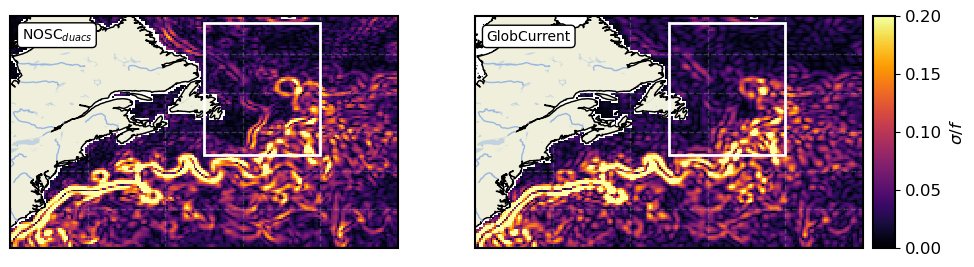

In [21]:
proj = ccrs.PlateCarree()
fig, axs = plt.subplots(nrows=1,ncols=2,
                    figsize=(11*1,7.5*1.5*2),subplot_kw={'projection': proj})

box_gs = [-80, -30, 30, 60]
box_zoom = [[-55, -40, 42, 59]]
time_target="2019-02-02"
list_zoom_extent=[box_gs]
list_zoom_ax = [[0.4, -0.11, 0.5, 0.5]]

vmax = 0.2
xp_name = "globcurrent_15m_4th"
strain, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_gs,interp=False,time_target=time_target)
#axs[0].pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.2,cmap=plt.cm.magma)
#axs[0].set_title("GC")
#plot_map_zoom(strain.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.gist_heat,fig=fig,axs=axs[0])
plot_map_zoom(strain.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.inferno,fig=fig,axs=axs[1],box_list=box_zoom,no_label=True,colorbar_label="$\sigma / f$")
#plt.scatter(32.5,-33,color="k")
axs[1].text(0.03, 0.88, 'GlobCurrent', transform=axs[1].transAxes,
         fontsize=10, verticalalignment='bottom', horizontalalignment='left',
         bbox=dict(boxstyle='round', facecolor='white', alpha=1))

xp_name = "unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet"
strain, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_gs,interp=False,time_target=time_target)

#axs[1].pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.2,cmap=plt.cm.magma)
#axs[1].set_title("NOSC$_{duacs}$")
plot_map_zoom(strain.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.inferno,fig=fig,axs=axs[0],box_list=box_zoom,no_label=True)
axs[0].text(0.03, 0.88, 'NOSC$_{duacs}$', transform=axs[0].transAxes,
         fontsize=10, verticalalignment='bottom', horizontalalignment='left',
         bbox=dict(boxstyle='round', facecolor='white', alpha=1))

plt.savefig(f"../figures/Figure_strain_zoom.png", dpi = 300,bbox_inches='tight',transparent=True)




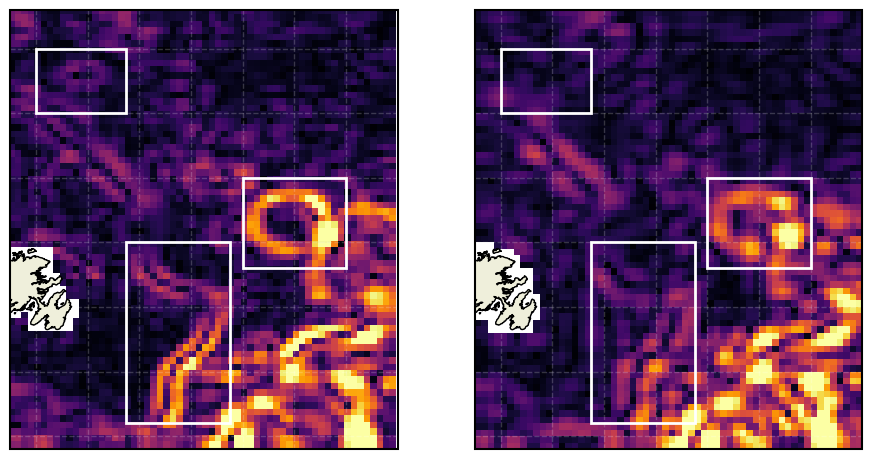

In [ ]:
proj = ccrs.PlateCarree()
fig, axs = plt.subplots(nrows=1,ncols=2,
                    figsize=(11*1,7.5*1.5*2),subplot_kw={'projection': proj})

#box_gs = [-60, -40, 40, 55]
#box_gs = [-55, -35, 40, 55]
#box_gs = [-60, -40, 40, 60]
box_gs = [-55, -40, 42, 59]
box_zoom = [[-54, -50.5, 55, 57.5],[-46, -42, 52.5, 49],[-50.5, -46.5, 50, 43]]

time_target="2019-02-02"
list_zoom_extent=[box_gs]
list_zoom_ax = [[0.4, -0.11, 0.5, 0.5]]
xp_name = "globcurrent_15m_4th"
strain, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_gs,interp=False,time_target=time_target)
#axs[0].pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.2,cmap=plt.cm.magma)
#plt.scatter(32.5,-33,color="k")
#axs[0].set_title("GC")
plot_map_zoom(strain.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.inferno,fig=fig,axs=axs[1],box_list=box_zoom,no_label=True)


xp_name = "unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet"
strain, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_gs,interp=False,time_target=time_target)

#axs[1].pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.2,cmap=plt.cm.magma)
#axs[1].set_title("NOSC$_{duacs}$")
plot_map_zoom(strain.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.inferno,fig=fig,axs=axs[0],box_list=box_zoom,no_label=True)

plt.savefig(f"../figures/Figure_strain_zoom_+.png", dpi = 300,bbox_inches='tight',transparent=True)

    

interp


Text(0.03, 0.88, 'NOSC')

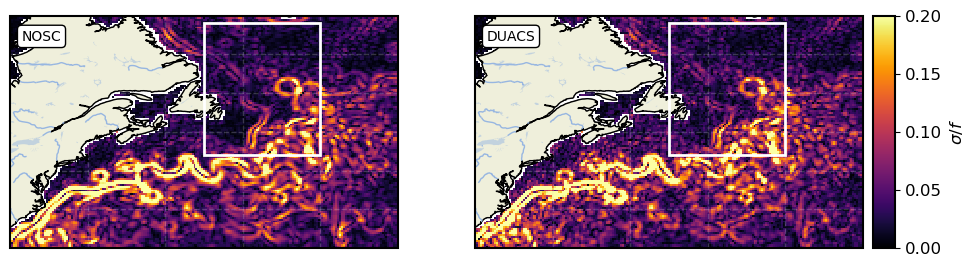

In [103]:
# DUACS
proj = ccrs.PlateCarree()
fig, axs = plt.subplots(nrows=1,ncols=2,
                    figsize=(11*1,7.5*1.5*2),subplot_kw={'projection': proj})

box_gs = [-80, -30, 30, 60]
box_zoom = [[-55, -40, 42, 59]]
time_target="2019-02-02"
list_zoom_extent=[box_gs]
list_zoom_ax = [[0.4, -0.11, 0.5, 0.5]]
vmax = 0.2

xp_name = "duacs_15m_8th"
strain, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_gs,interp=True,time_target=time_target)
#axs[0].pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.2,cmap=plt.cm.magma)
#axs[0].set_title("GC")
#plot_map_zoom(strain.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.gist_heat,fig=fig,axs=axs[0])
plot_map_zoom(strain.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.inferno,fig=fig,axs=axs[1],box_list=box_zoom,no_label=True,colorbar_label="$\sigma / f$")
#plt.scatter(32.5,-33,color="k")
axs[1].text(0.03, 0.88, 'DUACS', transform=axs[1].transAxes,
         fontsize=10, verticalalignment='bottom', horizontalalignment='left',
         bbox=dict(boxstyle='round', facecolor='white', alpha=1))

xp_name = "unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet"
strain, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_gs,interp=False,time_target=time_target)

#axs[1].pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.2,cmap=plt.cm.magma)
#axs[1].set_title("NOSC$_{duacs}$")
plot_map_zoom(strain.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.inferno,fig=fig,axs=axs[0],box_list=box_zoom,no_label=True)
axs[0].text(0.03, 0.88, 'NOSC', transform=axs[0].transAxes,
         fontsize=10, verticalalignment='bottom', horizontalalignment='left',
         bbox=dict(boxstyle='round', facecolor='white', alpha=1))


interp


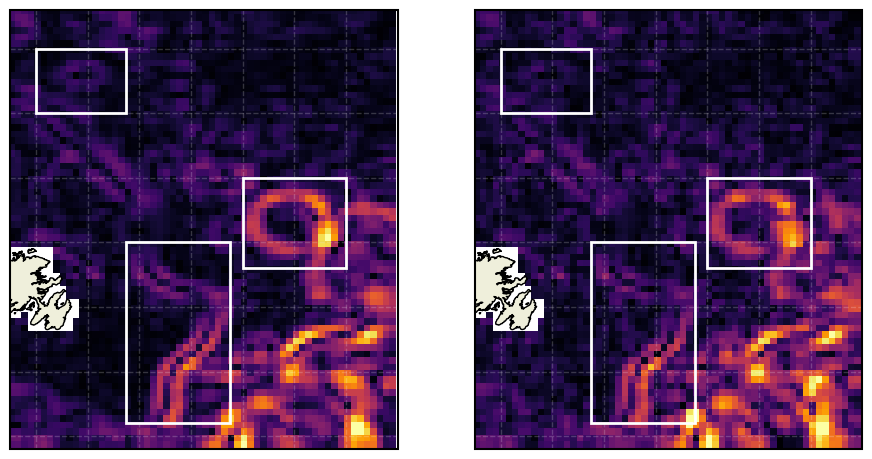

In [13]:
vmax=0.3
proj = ccrs.PlateCarree()
fig, axs = plt.subplots(nrows=1,ncols=2,
                    figsize=(11*1,7.5*1.5*2),subplot_kw={'projection': proj})

#box_gs = [-60, -40, 40, 55]
#box_gs = [-55, -35, 40, 55]
#box_gs = [-60, -40, 40, 60]
box_gs = [-55, -40, 42, 59]
box_zoom = [[-54, -50.5, 55, 57.5],[-46, -42, 52.5, 49],[-50.5, -46.5, 50, 43]]

time_target="2019-02-02"
list_zoom_extent=[box_gs]
list_zoom_ax = [[0.4, -0.11, 0.5, 0.5]]
xp_name = "duacs_15m_8th"
strain_duacs, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_gs,interp=True,time_target=time_target)
#axs[0].pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.2,cmap=plt.cm.magma)
#plt.scatter(32.5,-33,color="k")
#axs[0].set_title("GC")
plot_map_zoom(strain_duacs.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.inferno,fig=fig,axs=axs[1],box_list=box_zoom,no_label=True)


xp_name = "unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet"
strain_nosc, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_gs,interp=False,time_target=time_target)

#axs[1].pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.2,cmap=plt.cm.magma)
#axs[1].set_title("NOSC$_{duacs}$")
plot_map_zoom(strain_nosc.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.inferno,fig=fig,axs=axs[0],box_list=box_zoom,no_label=True)

#plt.savefig(f"../figures/Figure_strain_zoom_+.png", dpi = 300,bbox_inches='tight',transparent=True)

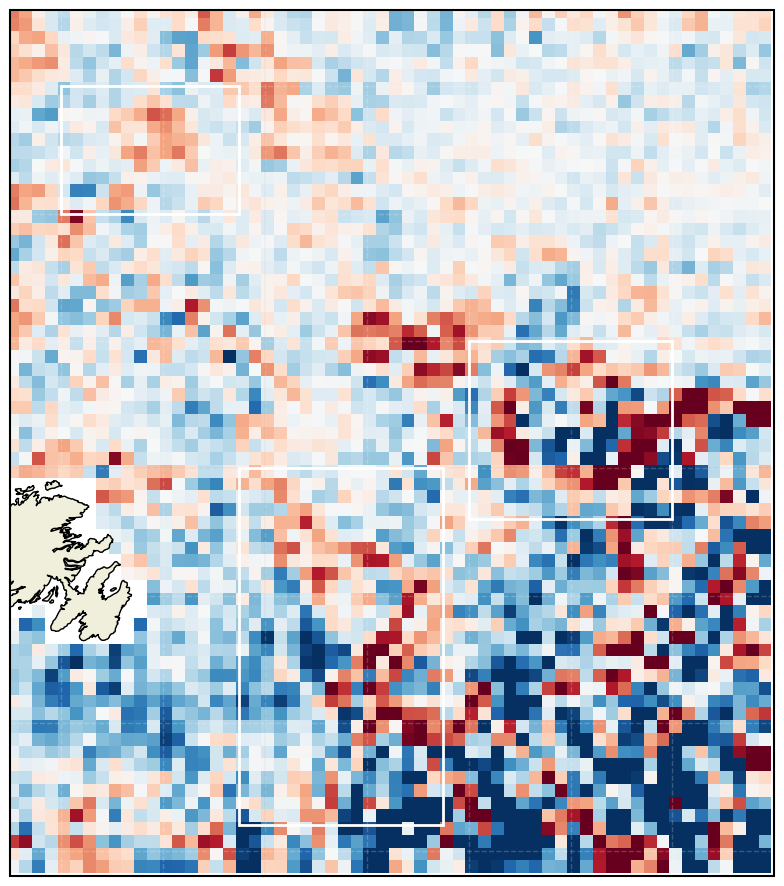

In [ ]:
proj = ccrs.PlateCarree()
fig, axs = plt.subplots(nrows=1,ncols=1,
                    figsize=(11*1,7.5*1.5*1),subplot_kw={'projection': proj})

vmax=0.03
plot_map_zoom(strain_nosc.T-strain_duacs.T,lon,lat,vmin=-vmax,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.RdBu_r,fig=fig,axs=axs,box_list=box_zoom,no_label=True)
#plt.contour(vrt.T,lon,lat,vmin=-vmax,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.RdBu_r,fig=fig,axs=axs,box_list=box_zoom,no_label=True)


interp


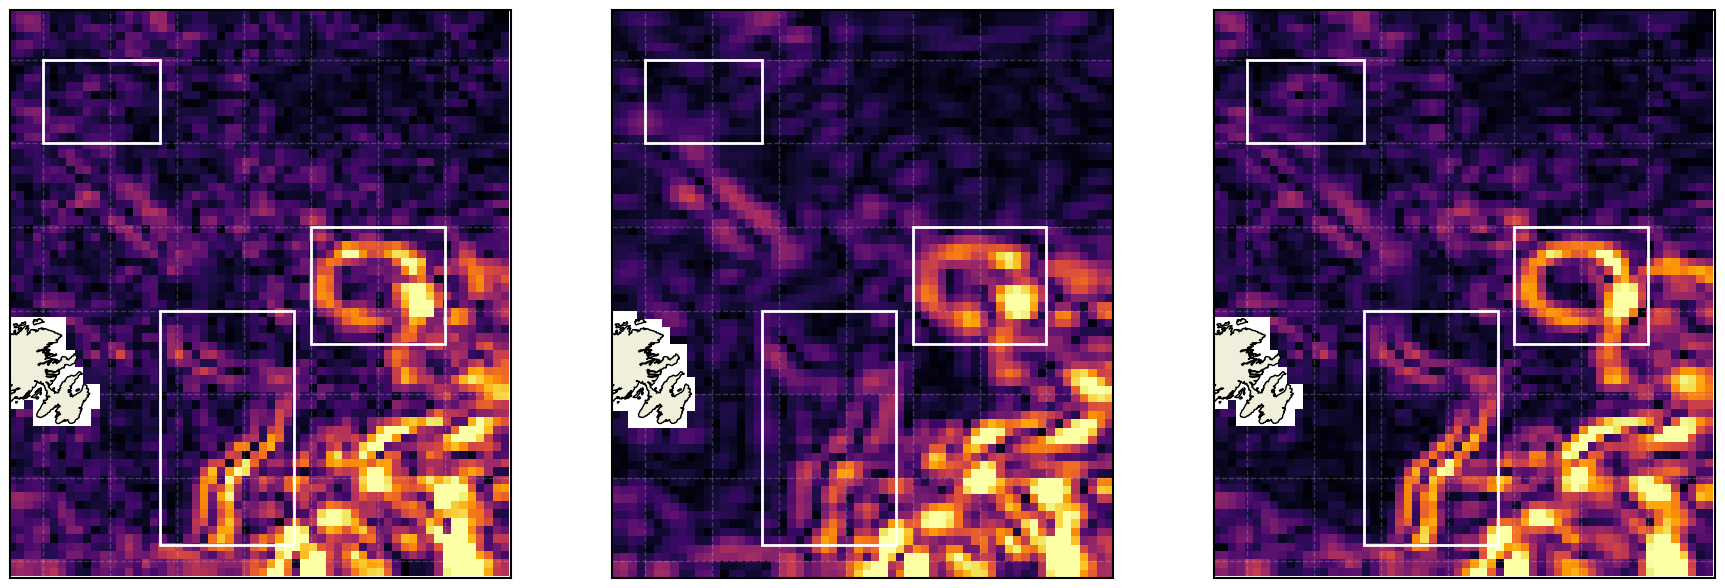

In [101]:
vmax=0.2
proj = ccrs.PlateCarree()
fig, axs = plt.subplots(nrows=1,ncols=3,
                    figsize=(11*2,7.5*1.5*3),subplot_kw={'projection': proj})

#box_gs = [-60, -40, 40, 55]
#box_gs = [-55, -35, 40, 55]
#box_gs = [-60, -40, 40, 60]
box_gs = [-55, -40, 42, 59]
box_zoom = [[-54, -50.5, 55, 57.5],[-46, -42, 52.5, 49],[-50.5, -46.5, 50, 43]]

time_target="2019-02-02"
list_zoom_extent=[box_gs]
list_zoom_ax = [[0.4, -0.11, 0.5, 0.5]]
xp_name = "globcurrent_raw"
strain_duacs, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_gs,interp=False,time_target=time_target)
#axs[0].pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.2,cmap=plt.cm.magma)
#plt.scatter(32.5,-33,color="k")
#axs[0].set_title("GC")
plot_map_zoom(strain_duacs.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.inferno,fig=fig,axs=axs[1],box_list=box_zoom,no_label=True)


xp_name = "duacs_15m_8th"
strain_duacs, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_gs,interp=True,time_target=time_target)

#axs[1].pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.2,cmap=plt.cm.magma)
#axs[1].set_title("NOSC$_{duacs}$")
plot_map_zoom(strain_duacs.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.inferno,fig=fig,axs=axs[0],box_list=box_zoom,no_label=True)

xp_name = "unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet"
strain_nosc, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_gs,interp=False,time_target=time_target)

#axs[1].pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.2,cmap=plt.cm.magma)
#axs[1].set_title("NOSC$_{duacs}$")
plot_map_zoom(strain_nosc.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.inferno,fig=fig,axs=axs[2],box_list=box_zoom,no_label=True)


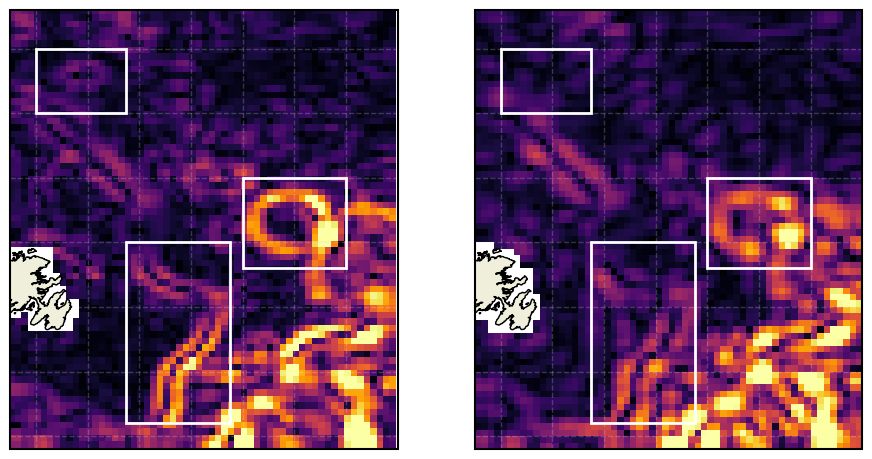

In [61]:
vmax=0.2
proj = ccrs.PlateCarree()
fig, axs = plt.subplots(nrows=1,ncols=2,
                    figsize=(11*1,7.5*1.5*2),subplot_kw={'projection': proj})

#box_gs = [-60, -40, 40, 55]
#box_gs = [-55, -35, 40, 55]
#box_gs = [-60, -40, 40, 60]
box_gs = [-55, -40, 42, 59]
box_zoom = [[-54, -50.5, 55, 57.5],[-46, -42, 52.5, 49],[-50.5, -46.5, 50, 43]]

time_target="2019-02-02"
list_zoom_extent=[box_gs]
list_zoom_ax = [[0.4, -0.11, 0.5, 0.5]]
xp_name = "GC_houly"
strain_duacs, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_gs,interp=False,time_target=time_target)
#axs[0].pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.2,cmap=plt.cm.magma)
#plt.scatter(32.5,-33,color="k")
#axs[0].set_title("GC")
plot_map_zoom(strain_duacs.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.inferno,fig=fig,axs=axs[1],box_list=box_zoom,no_label=True)


xp_name = "unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet"
strain_nosc, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_gs,interp=False,time_target=time_target)

#axs[1].pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.2,cmap=plt.cm.magma)
#axs[1].set_title("NOSC$_{duacs}$")
plot_map_zoom(strain_nosc.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.inferno,fig=fig,axs=axs[0],box_list=box_zoom,no_label=True)

<xarray.Dataset> Size: 17MB
Dimensions:    (latitude: 720, longitude: 1440)
Coordinates:
    depth      int16 2B 15
  * latitude   (latitude) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
    time       datetime64[ns] 8B 2019-01-01T12:00:00
Data variables:
    ugos       (latitude, longitude) float64 8MB ...
    vgos       (latitude, longitude) float64 8MB ...
Attributes:
    title:                     Total surface and 15m velocities
    Conventions:               CF-1.6
    institution:               CLS
    contact:                   servicedesk.cmems@mercator-ocean.eu
    references:                Mulet S., Rio M.-H., Etienne H., Artana C., Ca...
    copernicusmarine_version:  2.0.1


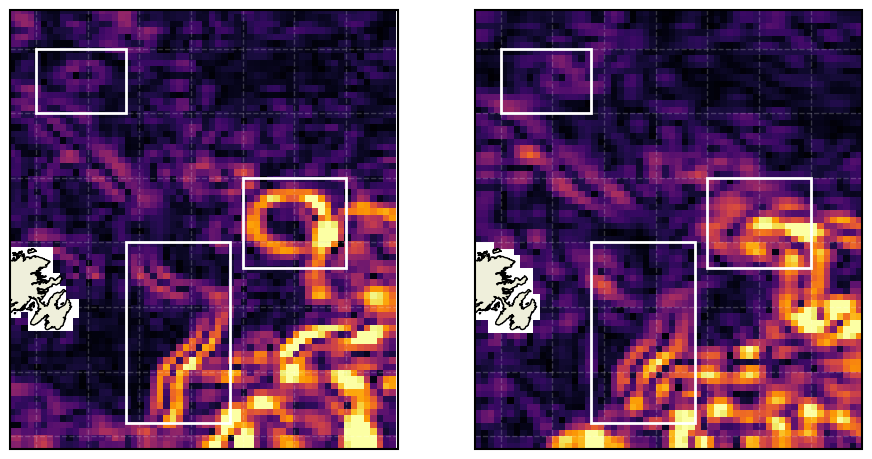

In [ ]:
vmax=0.2
proj = ccrs.PlateCarree()
fig, axs = plt.subplots(nrows=1,ncols=2,
                    figsize=(11*1,7.5*1.5*2),subplot_kw={'projection': proj})

#box_gs = [-60, -40, 40, 55]
#box_gs = [-55, -35, 40, 55]
#box_gs = [-60, -40, 40, 60]
box_gs = [-55, -40, 42, 59]
box_zoom = [[-54, -50.5, 55, 57.5],[-46, -42, 52.5, 49],[-50.5, -46.5, 50, 43]]

time_target="2019-02-02"
list_zoom_extent=[box_gs]
list_zoom_ax = [[0.4, -0.11, 0.5, 0.5]]
xp_name = "globcurrent_raw_h"
strain_duacs, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_gs,interp=False,time_target=time_target)
#axs[0].pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.2,cmap=plt.cm.magma)
#plt.scatter(32.5,-33,color="k")
#axs[0].set_title("GC")
plot_map_zoom(strain_duacs.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.inferno,fig=fig,axs=axs[1],box_list=box_zoom,no_label=True)


xp_name = "unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet"
strain_nosc, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_gs,interp=False,time_target=time_target)

#axs[1].pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.2,cmap=plt.cm.magma)
#axs[1].set_title("NOSC$_{duacs}$")
plot_map_zoom(strain_nosc.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.inferno,fig=fig,axs=axs[0],box_list=box_zoom,no_label=True)


interp


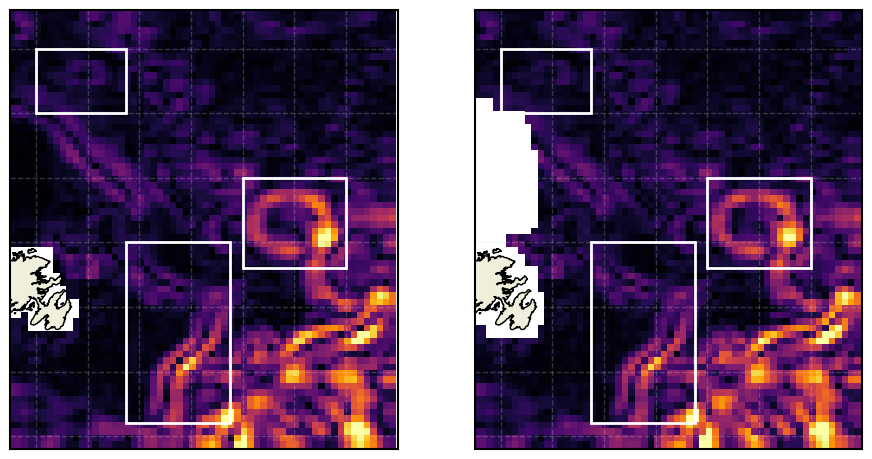

In [12]:
vmax=0.3
proj = ccrs.PlateCarree()
fig, axs = plt.subplots(nrows=1,ncols=2,
                    figsize=(11*1,7.5*1.5*2),subplot_kw={'projection': proj})

#box_gs = [-60, -40, 40, 55]
#box_gs = [-55, -35, 40, 55]
#box_gs = [-60, -40, 40, 60]
box_gs = [-55, -40, 42, 59]
box_zoom = [[-54, -50.5, 55, 57.5],[-46, -42, 52.5, 49],[-50.5, -46.5, 50, 43]]

time_target="2019-02-02"
list_zoom_extent=[box_gs]
list_zoom_ax = [[0.4, -0.11, 0.5, 0.5]]
xp_name = "neurost_sst_ssh_15m_10th"
strain_duacs, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_gs,interp=True,time_target=time_target)
#axs[0].pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.2,cmap=plt.cm.magma)
#plt.scatter(32.5,-33,color="k")
#axs[0].set_title("GC")
plot_map_zoom(strain_duacs.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.inferno,fig=fig,axs=axs[1],box_list=box_zoom,no_label=True)


xp_name = "unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_neurost_RonanUnet"
strain_nosc, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_gs,interp=False,time_target=time_target)

#axs[1].pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.2,cmap=plt.cm.magma)
#axs[1].set_title("NOSC$_{duacs}$")
plot_map_zoom(strain_nosc.T,lon,lat,vmin=0,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.inferno,fig=fig,axs=axs[0],box_list=box_zoom,no_label=True)

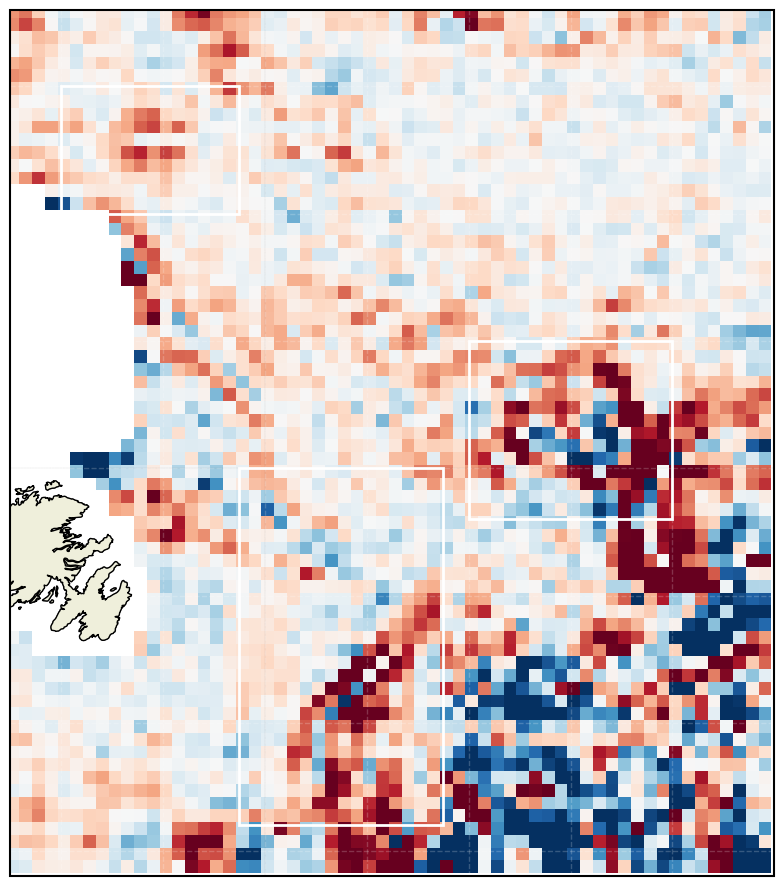

In [11]:
proj = ccrs.PlateCarree()
fig, axs = plt.subplots(nrows=1,ncols=1,
                    figsize=(11*1,7.5*1.5*1),subplot_kw={'projection': proj})

vmax=0.02
plot_map_zoom(strain_nosc.T-strain_duacs.T,lon,lat,vmin=-vmax,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.RdBu_r,fig=fig,axs=axs,box_list=box_zoom,no_label=True)
#plt.contour(vrt.T,lon,lat,vmin=-vmax,vmax=vmax,zoom_extent=box_gs,cmap=plt.cm.RdBu_r,fig=fig,axs=axs,box_list=box_zoom,no_label=True)

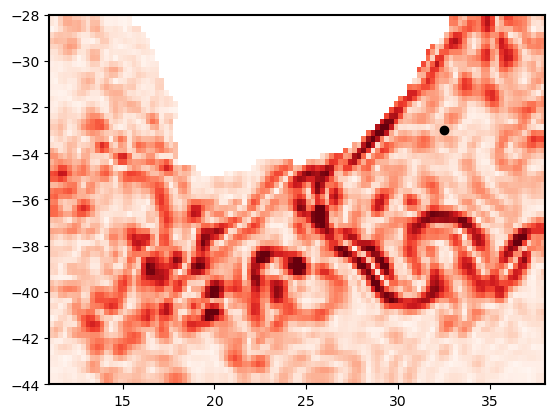

In [22]:
box_agulhas = [11, 38, -44, -28]
time_target="2019-11-15"
list_zoom_extent=[box_agulhas]
list_zoom_ax = [[0.4, -0.11, 0.5, 0.5]]
xp_name = "globcurrent_15m_4th"
strain, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_agulhas,interp=False,time_target=time_target)
#plot_map_multizoom(vrt.T,lon,lat,vmin=-0.3,vmax=0.3,lat_mask=10,list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent)

#plot_uv_map(vrt.T,lon,lat,vmin=-0.3,vmax=0.3,lat_mask=10)
#plot_jpdf(vrt,strain)

#plt.pcolormesh(lon,lat,vrt.T,vmin=-0.5,vmax=0.5,cmap=plt.cm.RdBu)
#plt.scatter(32.5,-33,color="k")

plt.pcolormesh(lon,lat,strain.T,vmin=0,vmax=0.3,cmap=plt.cm.Reds)
plt.scatter(32.5,-33,color="k")

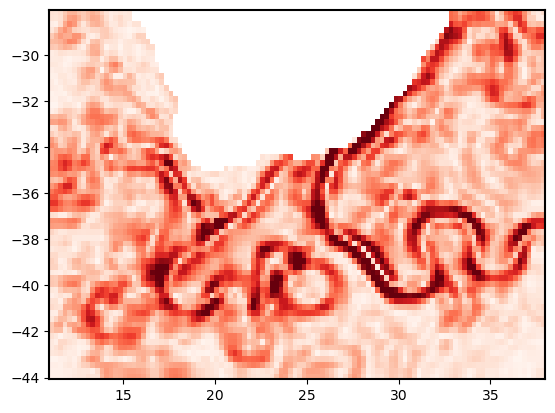

In [21]:
box_agulhas = [11, 38, -44, -28]
time_target="2019-11-15"
list_zoom_extent=[box_agulhas]
list_zoom_ax = [[0.4, -0.11, 0.5, 0.5]]
xp_name = "unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet"
strain, vrt, lon, lat = compute_strain_vrt(xp_name,domain=box_agulhas,interp=False,time_target=time_target)
#plot_map_multizoom(vrt.T,lon,lat,vmin=-0.3,vmax=0.3,lat_mask=10,list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent)

#plot_uv_map(vrt.T,lon,lat,vmin=-0.3,vmax=0.3,lat_mask=10)
#plot_jpdf(vrt,strain)
plt.pcolormesh(lon,lat,vrt.T,vmin=-0.5,vmax=0.5,cmap=plt.cm.RdBu)
plt.scatter(32.5,-33,color="k")
plt.pcolormesh(lon,lat,strain.T,vmin=-0,vmax=0.3,cmap=plt.cm.Reds)

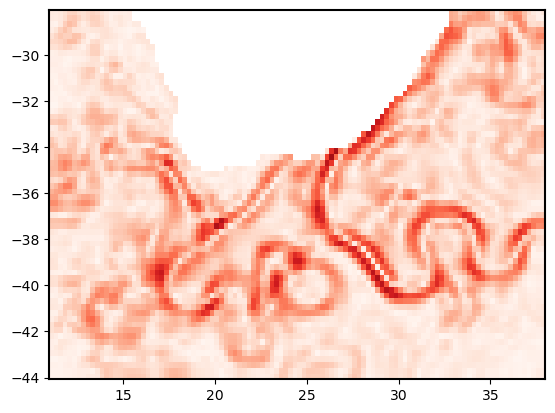

In [68]:
result_filepath =  "/Odyssey/private/t22picar/data/uv/GC_hourly/GC_hourly_15.00m_2019-01-01-2019-12-31.nc"

duacs = xr.open_dataset(result_filepath).sel(time="2019-01-01").isel(depth=0)
duacs = duacs.rename({"uo": "ugos"})
duacs = duacs.rename({"vo": "vgos"})

duacs = xr.open_dataset(result_filepath).sel(time="2019-01-01").isel(depth=0)
duacs = duacs.isel(time=12)
duacs = duacs.rename({"uo": "ugos"})
duacs = duacs.rename({"vo": "vgos"})

In [72]:
duacs.ugos

<xarray.DataArray 'ugos' (latitude: 720, longitude: 1440)> Size: 8MB
[1036800 values with dtype=float64]
Coordinates:
    depth      int16 2B 15
  * latitude   (latitude) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
    time       datetime64[ns] 8B 2019-01-01T12:00:00
Attributes:
    long_name:      Absolute geostrophic velocity + depth Ekman + tide veloci...
    units:          m/s
    standard_name:  eastward_sea_water_velocity

In [33]:
duacs = duacs.sel(lat=slice(-70,70))

In [37]:
duacs_4th

<xarray.Dataset> Size: 69GB
Dimensions:   (time: 4383, latitude: 680, lon: 1440)
Coordinates:
  * time      (time) datetime64[ns] 35kB 2010-01-01 2010-01-02 ... 2021-12-31
  * latitude  (latitude) float32 3kB -80.0 -79.75 -79.5 ... 89.5 89.75 90.0
  * lon       (lon) float32 6kB -180.0 -179.7 -179.5 ... 179.4 179.7 179.9
Data variables:
    zos       (time, latitude, lon) float32 17GB ...
    sla       (time, latitude, lon) float32 17GB ...
    ugos      (time, latitude, lon) float32 17GB ...
    vgos      (time, latitude, lon) float32 17GB ...
Attributes:
    references:                http://marine.copernicus.eu
    title:                     DT merged all satellites Global Ocean Gridded ...
    history:                   2024-10-23 12:55:06Z: Creation
    source:                    Altimetry measurements
    comment:                   Sea Surface Height measured by Altimetry and d...
    institution:               CLS, CNES
    contact:                   servicedesk.cmems@mercator-ocean.eu
    Conventions:               CF-1.6
    copernicusmarine_version:  2.0.1

In [ ]:
xp_name ='globcurrent_raw'
time_target="2019-02-02"

if time_target is None:
    time_target='2019-01-01'

if xp_name=="duacs_15m_8th":
    result_filepath =  f"/Odyssey/private/t22picar/multivar_drifter/rec/{xp_name}/daily/duacs_15m_8th_{time_target}.nc"
elif xp_name=="duacs_cyclo_8th":
    result_filepath =  f"/Odyssey/private/t22picar/process_data/cyclogeo/rec/duacs_cyclo_8th_{time_target}.nc"
elif xp_name=="GC_houly":
    result_filepath =  f"/Odyssey/private/t22picar/data/uv/GC_hourly/hourly_15m/unet_rec_{time_target}.nc"
elif xp_name=="globcurrent_raw":
    result_filepath =  "/Odyssey/private/t22picar/data/uv/GC_daily/daily/GC_daily_15.00m_15.00m_2019-02-01-2019-02-20.nc"
elif xp_name=="globcurrent_raw_h":
    result_filepath =  "/Odyssey/private/t22picar/data/uv/GC_hourly/GC_hourly_15.00m_2019-01-01-2019-12-31.nc"
else:
    result_filepath =  f"/Odyssey/private/t22picar/multivar_drifter/rec/{xp_name}/daily/unet_rec_{time_target}.nc"

if xp_name=="globcurrent_raw":
    duacs = xr.open_dataset(result_filepath).sel(time=time_target).isel(depth=0)
    duacs = duacs.rename({"uo": "ugos"})
    duacs = duacs.rename({"vo": "vgos"})

KeyError: "not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."

In [92]:
duacs.time

<xarray.DataArray 'time' (time: 20)> Size: 160B
array(['2019-02-01T00:00:00.000000000', '2019-02-02T00:00:00.000000000',
       '2019-02-03T00:00:00.000000000', '2019-02-04T00:00:00.000000000',
       '2019-02-05T00:00:00.000000000', '2019-02-06T00:00:00.000000000',
       '2019-02-07T00:00:00.000000000', '2019-02-08T00:00:00.000000000',
       '2019-02-09T00:00:00.000000000', '2019-02-10T00:00:00.000000000',
       '2019-02-11T00:00:00.000000000', '2019-02-12T00:00:00.000000000',
       '2019-02-13T00:00:00.000000000', '2019-02-14T00:00:00.000000000',
       '2019-02-15T00:00:00.000000000', '2019-02-16T00:00:00.000000000',
       '2019-02-17T00:00:00.000000000', '2019-02-18T00:00:00.000000000',
       '2019-02-19T00:00:00.000000000', '2019-02-20T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 160B 2019-02-01 2019-02-02 ... 2019-02-20
Attributes:
    axis:           T
    standard_name:  time
    unit_long:      Hours Since 1950-01-01T00:00:00+00:00
    long_name:      Time

In [86]:
duacs = xr.open_dataset(result_filepath)

In [87]:
duacs

<xarray.Dataset> Size: 332MB
Dimensions:    (depth: 1, latitude: 720, longitude: 1440, time: 20)
Coordinates:
  * depth      (depth) int16 2B 15
  * latitude   (latitude) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
  * time       (time) datetime64[ns] 160B 2019-02-01 2019-02-02 ... 2019-02-20
Data variables:
    uo         (time, depth, latitude, longitude) float64 166MB ...
    vo         (time, depth, latitude, longitude) float64 166MB ...
Attributes:
    references:                Mulet S., Rio M.-H., Etienne H., Artana C., Ca...
    institution:               CLS
    Conventions:               CF-1.6
    title:                     Daily mean total surface and 15m velocities
    contact:                   servicedesk.cmems@mercator-ocean.eu
    copernicusmarine_version:  2.0.1